# Bike Sharing Assignment

## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

## Goal
 
- To identify the variables increasing the sales, e.g. month, season

- To create a linear model that quantitatively relates bike demands with variables such as season, weekdays, weekends, etc.

- To know the accuracy of the model, i.e. how well these variables can predict bike demand.

In [1]:
#Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Read data file
df=pd.read_csv("day.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#Checking the null in the dataset
print(df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [7]:
#Adding the name from the dictionary
df['season1'] = df['season'].map({1:"spring",2:"summer",3:"fall",4:"winter"})
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season1
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,spring
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,spring
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,spring
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,spring
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,spring


In [8]:
#Adding the name from the dictionary
df['weathersit1'] = df['weathersit'].map({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'})
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season1,weathersit1
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,spring,Mist_cloudy
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,spring,Mist_cloudy
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,spring,Clear_Few Clouds
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,spring,Clear_Few Clouds
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,spring,Clear_Few Clouds


In [9]:
#Adding the name from the dictionary
df['weekday1'] = df['weekday'].map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season1,weathersit1,weekday1
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,spring,Mist_cloudy,Saturday
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,spring,Mist_cloudy,Sunday
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,spring,Clear_Few Clouds,Monday
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,spring,Clear_Few Clouds,Tuesday
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,spring,Clear_Few Clouds,Wednesday


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   instant      730 non-null    int64  
 1   dteday       730 non-null    object 
 2   season       730 non-null    int64  
 3   yr           730 non-null    int64  
 4   mnth         730 non-null    int64  
 5   holiday      730 non-null    int64  
 6   weekday      730 non-null    int64  
 7   workingday   730 non-null    int64  
 8   weathersit   730 non-null    int64  
 9   temp         730 non-null    float64
 10  atemp        730 non-null    float64
 11  hum          730 non-null    float64
 12  windspeed    730 non-null    float64
 13  casual       730 non-null    int64  
 14  registered   730 non-null    int64  
 15  cnt          730 non-null    int64  
 16  season1      730 non-null    object 
 17  weathersit1  730 non-null    object 
 18  weekday1     730 non-null    object 
dtypes: float

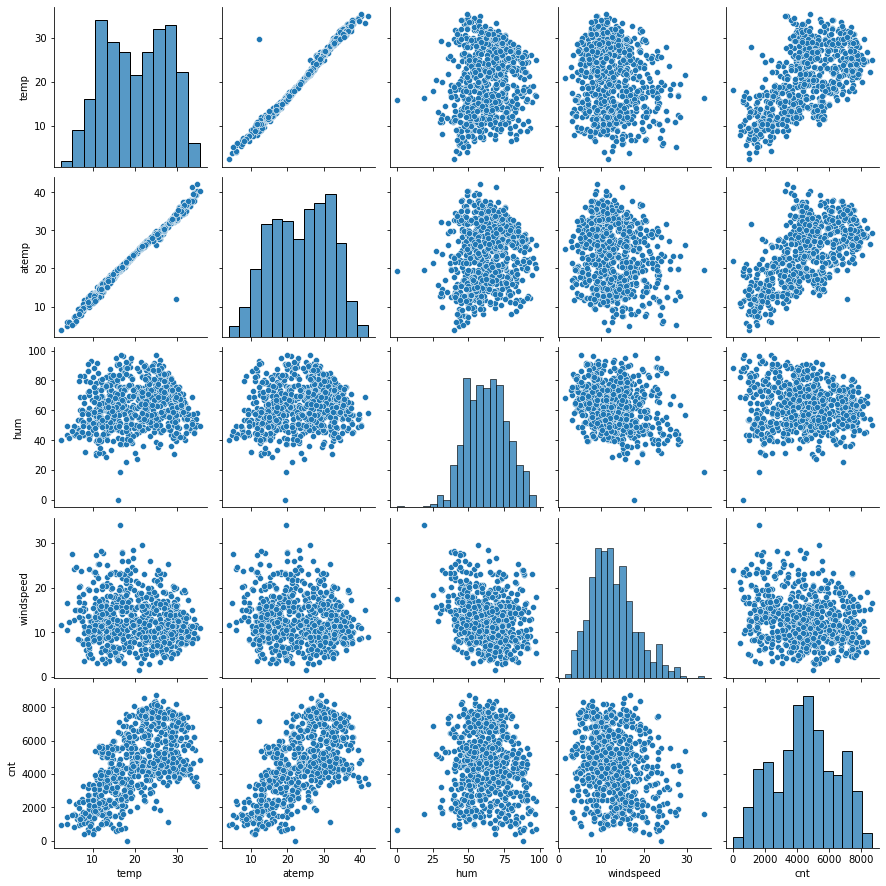

In [11]:
#Check the correlation using pairplot
sns.pairplot(df, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

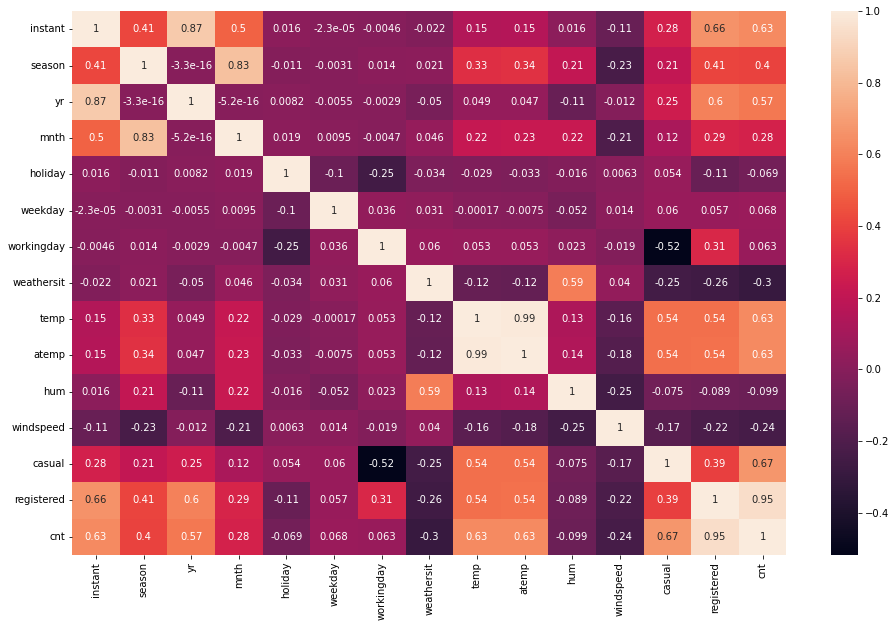

In [12]:
#check the correlation using heatmap
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [13]:
#Removing non used columns (instant,registered,dteday,casual)
df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season1,weathersit1,weekday1
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,spring,Mist_cloudy,Saturday
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,spring,Mist_cloudy,Sunday
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,spring,Clear_Few Clouds,Monday
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,spring,Clear_Few Clouds,Tuesday
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,spring,Clear_Few Clouds,Wednesday


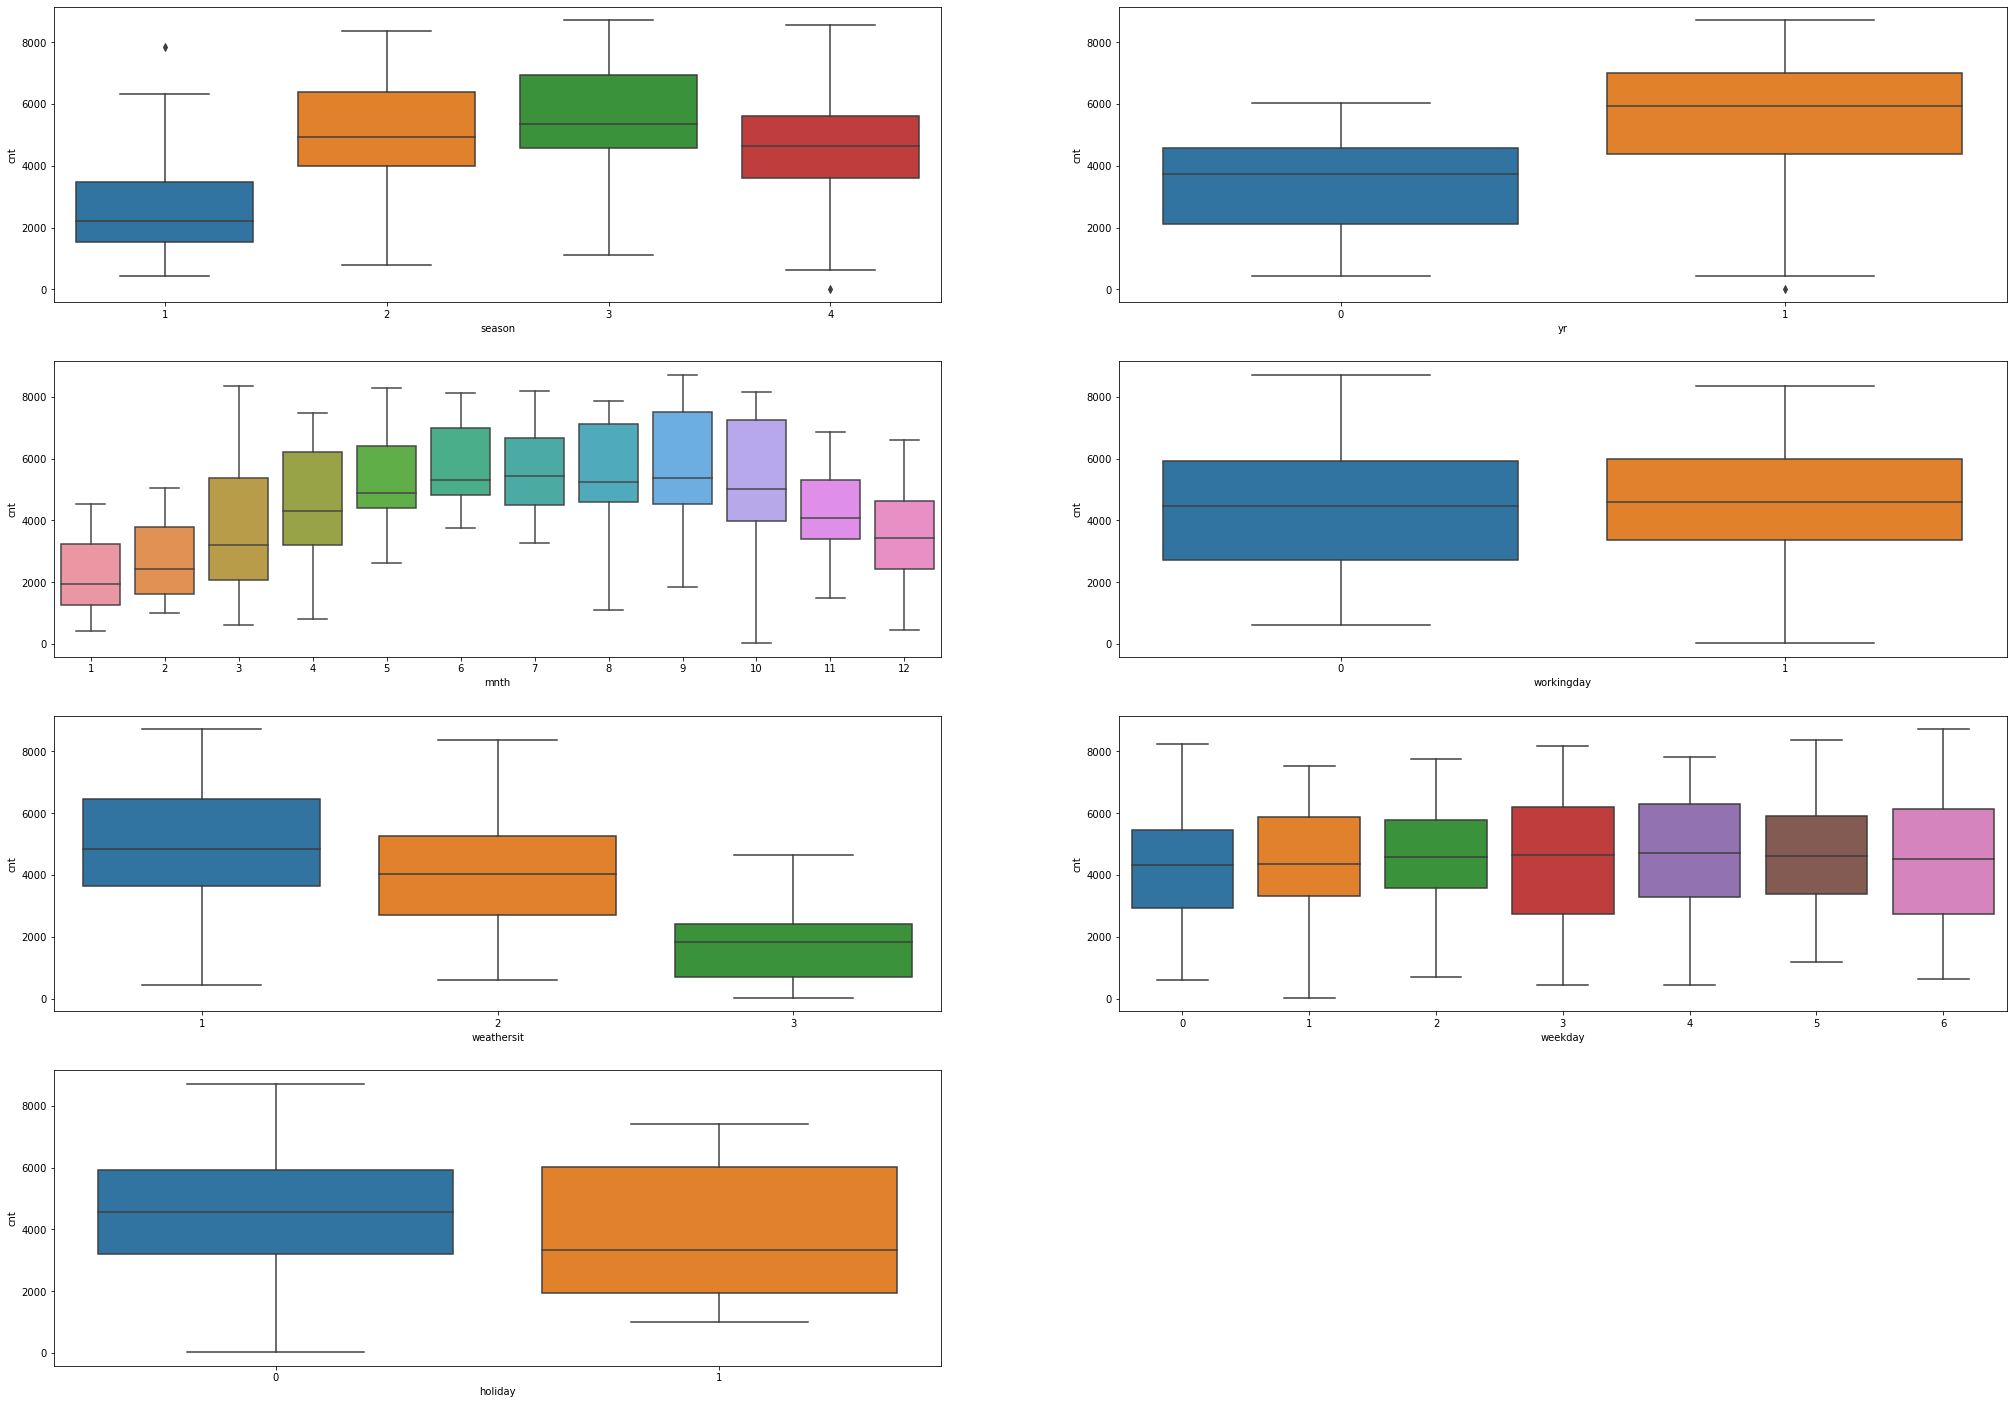

In [14]:
#Plotting the boxplot
plt.figure(figsize=(35, 25))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(4,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(4,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(4,2,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(4,2,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(4,2,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(4,2,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)

plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    int64  
 1   yr           730 non-null    int64  
 2   mnth         730 non-null    int64  
 3   holiday      730 non-null    int64  
 4   weekday      730 non-null    int64  
 5   workingday   730 non-null    int64  
 6   weathersit   730 non-null    int64  
 7   temp         730 non-null    float64
 8   atemp        730 non-null    float64
 9   hum          730 non-null    float64
 10  windspeed    730 non-null    float64
 11  cnt          730 non-null    int64  
 12  season1      730 non-null    object 
 13  weathersit1  730 non-null    object 
 14  weekday1     730 non-null    object 
dtypes: float64(4), int64(8), object(3)
memory usage: 85.7+ KB


In [16]:
# transforming the categorical data
Season1_dummies=pd.get_dummies(df['season1'],drop_first=True)
weathersit1_dummies=pd.get_dummies(df['weathersit1'],drop_first=True)
weekday1_dummies=pd.get_dummies(df['weekday1'],drop_first=True)
Month_dummies=pd.get_dummies(df['mnth'],drop_first=True)

In [17]:
df=pd.concat([df,Season1_dummies],axis=1)
df=pd.concat([df,weathersit1_dummies],axis=1)
df=pd.concat([df,weekday1_dummies],axis=1)
df=pd.concat([df,Month_dummies],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   season                              730 non-null    int64  
 1   yr                                  730 non-null    int64  
 2   mnth                                730 non-null    int64  
 3   holiday                             730 non-null    int64  
 4   weekday                             730 non-null    int64  
 5   workingday                          730 non-null    int64  
 6   weathersit                          730 non-null    int64  
 7   temp                                730 non-null    float64
 8   atemp                               730 non-null    float64
 9   hum                                 730 non-null    float64
 10  windspeed                           730 non-null    float64
 11  cnt                                 730 non-n

In [18]:
#Delete the original columns from the dataset
df.drop(['season','weathersit','weekday','mnth','season1','weathersit1','weekday1','temp'],axis=1,inplace=True)
df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [20]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,11.5850,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [21]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,1,22.85230,81.2917,13.250121,2659,0,0,1,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,1,32.19710,30.5000,19.583229,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [22]:
scaler=MinMaxScaler()

In [23]:
num_vars=['atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [24]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [25]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
# X_train, y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [27]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [28]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Light rain_Light snow_Thunderstorm,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [29]:
# Build model with first 15 variables
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [30]:
col = X_train.columns[rfe.support_]
col

Index([                                'yr',
                                  'holiday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                   'spring',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          4,
                                          5,
                                          6,
                                          8,
                                          9],
      dtype='object')

In [31]:
X_train.columns[~rfe.support_]

Index(['workingday',     'summer',     'Monday',   'Saturday',     'Sunday',
         'Thursday',    'Tuesday',  'Wednesday',            2,            7,
                 10,           11,           12],
      dtype='object')

In [32]:
X_train_rfe = X_train[col]

In [33]:
#Add a constant
X_train_rfe1 = sm.add_constant(X_train_rfe)

#Create model
lm = sm.OLS(y_train,X_train_rfe1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.6
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          8.06e-186
Time:                        21:39:16   Log-Likelihood:                 506.64
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     494   BIC:                            -913.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [34]:
#Calculate the VIF 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.72
2,atemp,15.52
4,windspeed,4.56
5,spring,3.52
6,winter,3.21
8,Mist_cloudy,2.26
0,yr,2.08
13,8,1.90
11,5,1.77
10,4,1.68


### Removing the colums based on below conditions
    1.High p-value, high VIF
    2.High p, low VIF: remove in the first step
      Low p, high VIF: remove these in next step
    3.Low p, low VIF
    

In [35]:
#Delete column with high VIF 
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [36]:
#Add a constant & Create Model
X_train_rfe1 = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train,X_train_rfe1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     178.8
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.75e-183
Time:                        21:39:17   Log-Likelihood:                 497.88
No. Observations:                 510   AIC:                            -965.8
Df Residuals:                     495   BIC:                            -902.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [37]:
#Calculate the VIF 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.26
3,windspeed,4.56
4,spring,2.10
0,yr,2.08
5,winter,1.97
12,8,1.86
11,6,1.64
10,5,1.60
7,Mist_cloudy,1.55
9,4,1.54


In [38]:
#COLUMN temp HAS A VERY HIGH VIF SO WE DROP IT
X_train_rfe=X_train_rfe.drop(['atemp'],axis=1)

In [39]:
#Add a constant & Create Model
X_train_rfe2 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     134.4
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          3.90e-153
Time:                        21:39:17   Log-Likelihood:                 423.38
No. Observations:                 510   AIC:                            -818.8
Df Residuals:                     496   BIC:                            -759.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [40]:
#Calculate the VIF 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.95
3,spring,2.10
0,yr,1.90
4,winter,1.80
6,Mist_cloudy,1.54
8,4,1.48
9,5,1.32
7,3,1.31
11,8,1.31
10,6,1.24


In [41]:
#Delet Windspeed has high VIF 
X_train_rfe=X_train_rfe.drop(['windspeed'],axis=1)

In [42]:
#Add a constant & Create Model
X_train_rfe3 = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     134.9
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          9.96e-148
Time:                        21:39:17   Log-Likelihood:                 407.93
No. Observations:                 510   AIC:                            -789.9
Df Residuals:                     497   BIC:                            -734.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [43]:
#Calculate the VIF 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.85
5,Mist_cloudy,1.53
2,spring,1.48
3,winter,1.39
6,3,1.23
10,8,1.17
7,4,1.14
8,5,1.14
11,9,1.12
9,6,1.08


In [44]:
#Winter has high p-value insignificant
X_train_rfe=X_train_rfe.drop(['winter'],axis=1)

In [45]:
#Add a constant & Create Model
X_train_rfe4 = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_rfe4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     147.4
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          9.28e-149
Time:                        21:39:17   Log-Likelihood:                 407.78
No. Observations:                 510   AIC:                            -791.6
Df Residuals:                     498   BIC:                            -740.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [46]:
#Calculate the VIF 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.61
2,spring,1.41
4,Mist_cloudy,1.39
5,3,1.23
9,8,1.13
6,4,1.11
7,5,1.11
10,9,1.11
8,6,1.07
1,holiday,1.03


In [47]:
#4 has high p-value insignificant
X_train_rfe=X_train_rfe.drop([4],axis=1)

In [48]:
#Add a constant & Create Model
X_train_rfe5 = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_rfe5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.3
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.76e-149
Time:                        21:39:18   Log-Likelihood:                 406.38
No. Observations:                 510   AIC:                            -790.8
Df Residuals:                     499   BIC:                            -744.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [49]:
#Calculate the VIF 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.51
2,spring,1.39
4,Mist_cloudy,1.36
5,3,1.22
8,8,1.12
6,5,1.10
9,9,1.10
7,6,1.06
1,holiday,1.03
3,Light rain_Light snow_Thunderstorm,1.02


In [50]:
#Add remaining columns one by one and check the pvalue & VIF
X_train_rfe['Saturday']=X_train['Saturday']
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Saturday
653,1,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,1,1,0,0,0,0,1
728,1,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,1


In [51]:
#Add a constant & Create Model
X_train_rfe6 = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_rfe6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     146.6
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.47e-148
Time:                        21:39:18   Log-Likelihood:                 406.77
No. Observations:                 510   AIC:                            -789.5
Df Residuals:                     498   BIC:                            -738.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [52]:
#Calculate the VIF 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.52
2,spring,1.41
4,Mist_cloudy,1.38
5,3,1.23
10,Saturday,1.14
8,8,1.13
9,9,1.11
6,5,1.10
7,6,1.07
1,holiday,1.03


In [53]:
#Saturday has high p-value
X_train_rfe=X_train_rfe.drop(['Saturday'],axis=1)

In [54]:
#Add remaining columns one by one and check the pvalue & VIF
X_train_rfe['Sunday']=X_train['Sunday']
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Sunday
653,1,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,1,1,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1
482,1,0,0,0,1,0,0,0,0,0,0


In [55]:
#Add a constant & Create Model
X_train_rfe8 = sm.add_constant(X_train_rfe)
lm8 = sm.OLS(y_train,X_train_rfe8).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     150.5
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.81e-150
Time:                        21:39:18   Log-Likelihood:                 411.83
No. Observations:                 510   AIC:                            -799.7
Df Residuals:                     498   BIC:                            -748.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [56]:
#Calculate the VIF 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.54
2,spring,1.41
4,Mist_cloudy,1.37
5,3,1.23
8,8,1.12
9,9,1.11
10,Sunday,1.11
6,5,1.10
7,6,1.07
1,holiday,1.03


In [57]:
#Add remaining columns one by one and check the pvalue & VIF
X_train_rfe['workingday']=X_train['workingday']
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Sunday,workingday
653,1,0,0,0,0,0,0,0,0,0,0,1
576,1,0,0,0,0,0,0,0,0,0,0,1
426,1,0,1,0,1,1,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1,0
482,1,0,0,0,1,0,0,0,0,0,0,0


In [58]:
#Add a constant & Create Model
X_train_rfe9 = sm.add_constant(X_train_rfe)
lm9 = sm.OLS(y_train,X_train_rfe9).fit()
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     137.7
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.18e-149
Time:                        21:39:18   Log-Likelihood:                 411.87
No. Observations:                 510   AIC:                            -797.7
Df Residuals:                     497   BIC:                            -742.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [59]:
#Calculate the VIF 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,workingday,2.56
0,yr,1.85
2,spring,1.55
4,Mist_cloudy,1.48
10,Sunday,1.27
5,3,1.24
6,5,1.19
8,8,1.19
9,9,1.16
7,6,1.14


In [60]:
#workingday has high pvalue
X_train_rfe=X_train_rfe.drop(['workingday'],axis=1)

In [61]:
#Add remaining columns one by one and check the pvalue & VIF
X_train_rfe[2]=X_train[2]
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Sunday,2
653,1,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,1,1,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1,0
482,1,0,0,0,1,0,0,0,0,0,0,0


In [62]:
#Add a constant & Create Model
X_train_rfe11 = sm.add_constant(X_train_rfe)
lm11 = sm.OLS(y_train,X_train_rfe11).fit()
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     137.7
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.06e-149
Time:                        21:39:18   Log-Likelihood:                 411.93
No. Observations:                 510   AIC:                            -797.9
Df Residuals:                     497   BIC:                            -742.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [63]:
#Calculate the VIF 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,spring,1.97
0,yr,1.54
11,2,1.49
4,Mist_cloudy,1.37
5,3,1.32
8,8,1.12
9,9,1.11
10,Sunday,1.11
6,5,1.10
7,6,1.07


In [64]:
#2 has high pvalue
X_train_rfe=X_train_rfe.drop([2],axis=1)

In [65]:
#Add remaining columns one by one and check the pvalue & VIF
X_train_rfe[7]=X_train[7]
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Sunday,7
653,1,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0,1
426,1,0,1,0,1,1,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1,0
482,1,0,0,0,1,0,0,0,0,0,0,0


In [66]:
#Add a constant & Create Model
X_train_rfe13 = sm.add_constant(X_train_rfe)
lm13 = sm.OLS(y_train,X_train_rfe13).fit()
print(lm13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     146.8
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.03e-154
Time:                        21:39:19   Log-Likelihood:                 424.54
No. Observations:                 510   AIC:                            -823.1
Df Residuals:                     497   BIC:                            -768.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [67]:
#Calculate the VIF 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.62
2,spring,1.42
4,Mist_cloudy,1.37
5,3,1.23
8,8,1.13
10,Sunday,1.12
6,5,1.11
9,9,1.11
11,7,1.08
7,6,1.07


In [68]:
#Add remaining columns one by one and check the pvalue & VIF
X_train_rfe[10]=X_train[10]
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Sunday,7,10
653,1,0,0,0,0,0,0,0,0,0,0,0,1
576,1,0,0,0,0,0,0,0,0,0,0,1,0
426,1,0,1,0,1,1,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0,0


In [69]:
#Add a constant & Create Model
X_train_rfe14 = sm.add_constant(X_train_rfe)
lm14 = sm.OLS(y_train,X_train_rfe14).fit()
print(lm14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     149.7
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          3.24e-162
Time:                        21:39:19   Log-Likelihood:                 445.00
No. Observations:                 510   AIC:                            -862.0
Df Residuals:                     496   BIC:                            -802.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [70]:
#Calculate the VIF 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.68
2,spring,1.45
4,Mist_cloudy,1.41
5,3,1.23
12,10,1.17
8,8,1.14
10,Sunday,1.14
9,9,1.13
6,5,1.12
11,7,1.09


In [71]:
#Add remaining columns one by one and check the pvalue & VIF
X_train_rfe[11]=X_train[11]
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Sunday,7,10,11
653,1,0,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,1,0,1,1,0,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [72]:
#Add a constant & Create Model
X_train_rfe15 = sm.add_constant(X_train_rfe)
lm15 = sm.OLS(y_train,X_train_rfe15).fit()
print(lm15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     139.0
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.70e-161
Time:                        21:39:20   Log-Likelihood:                 445.42
No. Observations:                 510   AIC:                            -860.8
Df Residuals:                     495   BIC:                            -797.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [73]:
#Calculate the VIF 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.76
2,spring,1.48
4,Mist_cloudy,1.45
5,3,1.23
12,10,1.19
8,8,1.16
10,Sunday,1.16
13,11,1.15
6,5,1.14
9,9,1.14


In [74]:
#11 has high pvalue
X_train_rfe=X_train_rfe.drop([11],axis=1)

In [75]:
#Add remaining columns one by one and check the pvalue & VIF
X_train_rfe[12]=X_train[12]
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Sunday,7,10,12
653,1,0,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,1,0,1,1,0,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1,0,0,1
482,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [76]:
#Add a constant & Create Model
X_train_rfe17 = sm.add_constant(X_train_rfe)
lm17 = sm.OLS(y_train,X_train_rfe17).fit()
print(lm17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     138.7
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          4.05e-161
Time:                        21:39:20   Log-Likelihood:                 445.00
No. Observations:                 510   AIC:                            -860.0
Df Residuals:                     495   BIC:                            -796.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [77]:
#Calculate the VIF 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.71
2,spring,1.46
4,Mist_cloudy,1.44
5,3,1.25
12,10,1.17
8,8,1.15
10,Sunday,1.15
6,5,1.13
9,9,1.13
13,12,1.10


In [78]:
#12 has high pvalue
X_train_rfe=X_train_rfe.drop([12],axis=1)

In [79]:
#Add remaining columns one by one and check the pvalue & VIF
X_train_rfe['Monday']=X_train['Monday']
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Sunday,7,10,Monday
653,1,0,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,1,0,1,1,0,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [80]:
#Add a constant & Create Model
X_train_rfe19 = sm.add_constant(X_train_rfe)
lm19 = sm.OLS(y_train,X_train_rfe19).fit()
print(lm19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     139.7
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.10e-161
Time:                        21:39:20   Log-Likelihood:                 446.35
No. Observations:                 510   AIC:                            -862.7
Df Residuals:                     495   BIC:                            -799.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [81]:
#Calculate the VIF 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.72
2,spring,1.46
4,Mist_cloudy,1.42
13,Monday,1.28
5,3,1.23
12,10,1.18
10,Sunday,1.16
8,8,1.15
1,holiday,1.13
6,5,1.13


In [82]:
#Monday has high pvalue
X_train_rfe=X_train_rfe.drop(['Monday'],axis=1)

In [83]:
#Add remaining columns one by one and check the pvalue & VIF
X_train_rfe['Tuesday']=X_train['Tuesday']
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Sunday,7,10,Tuesday
653,1,0,0,0,0,0,0,0,0,0,0,0,1,1
576,1,0,0,0,0,0,0,0,0,0,0,1,0,1
426,1,0,1,0,1,1,0,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [84]:
#Add a constant & Create Model
X_train_rfe21 = sm.add_constant(X_train_rfe)
lm21 = sm.OLS(y_train,X_train_rfe21).fit()
print(lm21.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     138.8
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          3.59e-161
Time:                        21:39:21   Log-Likelihood:                 445.13
No. Observations:                 510   AIC:                            -860.3
Df Residuals:                     495   BIC:                            -796.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [85]:
#Calculate the VIF 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.69
2,spring,1.46
4,Mist_cloudy,1.42
5,3,1.23
12,10,1.18
10,Sunday,1.16
8,8,1.15
13,Tuesday,1.15
6,5,1.14
9,9,1.13


In [86]:
#Tuesday has high pvalue
X_train_rfe=X_train_rfe.drop(['Tuesday'],axis=1)

In [87]:
#Add remaining columns one by one and check the pvalue & VIF
X_train_rfe['Wednesday']=X_train['Wednesday']
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Sunday,7,10,Wednesday
653,1,0,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,1,0,1,1,0,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [88]:
#Add a constant & Create Model
X_train_rfe23 = sm.add_constant(X_train_rfe)
lm23 = sm.OLS(y_train,X_train_rfe23).fit()
print(lm23.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     138.9
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          3.20e-161
Time:                        21:39:22   Log-Likelihood:                 445.25
No. Observations:                 510   AIC:                            -860.5
Df Residuals:                     495   BIC:                            -797.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [89]:
#Calculate the VIF 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.69
2,spring,1.48
4,Mist_cloudy,1.42
5,3,1.23
13,Wednesday,1.21
10,Sunday,1.17
12,10,1.17
8,8,1.16
6,5,1.14
9,9,1.14


In [90]:
#Wednesday has high pvalue
X_train_rfe=X_train_rfe.drop(['Wednesday'],axis=1)

In [91]:
#Add remaining columns one by one and check the pvalue & VIF
X_train_rfe['Thursday']=X_train['Thursday']
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Sunday,7,10,Thursday
653,1,0,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,1,0,1,1,0,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [92]:
#Add a constant & Create Model
X_train_rfe25 = sm.add_constant(X_train_rfe)
lm25 = sm.OLS(y_train,X_train_rfe25).fit()
print(lm25.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     138.7
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          3.99e-161
Time:                        21:39:23   Log-Likelihood:                 445.02
No. Observations:                 510   AIC:                            -860.0
Df Residuals:                     495   BIC:                            -796.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [93]:
#Calculate the VIF 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.69
2,spring,1.47
4,Mist_cloudy,1.41
5,3,1.24
12,10,1.17
10,Sunday,1.16
8,8,1.15
9,9,1.14
13,Thursday,1.14
6,5,1.13


In [94]:
#Thursday has high pvalue
X_train_rfe=X_train_rfe.drop(['Thursday'],axis=1)

####  VIFs and p-values both are within an acceptable range. considering our predictions using this model only.

## Residual Analysis of the train data

In [95]:
#Predict values
y_train_cnt = lm14.predict(X_train_rfe14)

In [96]:
#CALCULATING RESIDUALS
res=y_train - y_train_cnt
res

653    0.092032
576    0.045905
426    0.035105
728   -0.203458
482   -0.081702
         ...   
526    0.051176
578    0.023658
53     0.007588
350   -0.005178
79    -0.144845
Length: 510, dtype: float64

Text(0.5, 0, 'Errors')

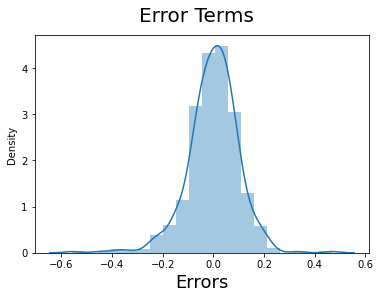

In [97]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

## Making Predictions

In [98]:
#Checking columns
X_train_rfe14.columns

Index([                             'const',
                                       'yr',
                                  'holiday',
                                   'spring',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          5,
                                          6,
                                          8,
                                          9,
                                   'Sunday',
                                          7,
                                         10],
      dtype='object')

In [99]:
#Scaling the test data
num_vars=['atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [100]:
#Creating x and y sets
y_test = df_test.pop('cnt')
X_test = df_test

In [101]:
X_train_new=X_train_rfe14.drop(['const'], axis=1)

In [102]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [103]:
#Making predictions on the chosen model

y_pred = lm14.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

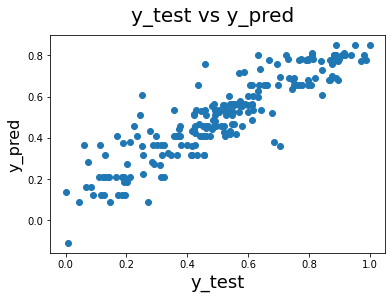

In [104]:
#Pred vs test
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

In [105]:
#Returns the mean squared error
np.sqrt(mean_squared_error(y_test, y_pred))

0.10573120032920401

In [106]:
#Calculate the r square for test
r_squared = r2_score(y_test, y_pred)
r_squared

0.8029017439604784

In [107]:
print(X_train_rfe14.columns)
print(lm14.summary())

Index([                             'const',
                                       'yr',
                                  'holiday',
                                   'spring',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          5,
                                          6,
                                          8,
                                          9,
                                   'Sunday',
                                          7,
                                         10],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     149.7
Date:                Tue, 08 Fe

### The equation of best fitted line is:

cnt= 0.246 * yr 
    - 0.083 * holiday 
    - 0.198 * Spring 
    - 0.321 * Light rain_Light snow_Thunderstorm 
    - 0.090 * Mist_Cloudy 
    + 0.063 * 3 
    + 0.123 * 5 
    + 0.148 * 6 
    + 0.153 * 8 
    + 0.193 * 9 
    - 0.049 * Sunday 
    + 0.126 * 7 
    + 0.116 * 10